In [51]:
# Usuful imports
import numpy as np
import matplotlib.pyplot as plt
import camb
import pandas as pd

In [52]:
# Defining the standard set of parameters with Planck 2018 cosmological parameters
std_pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

# Calculate results for these parameters
std_results = camb.get_results(std_pars)

# Computing the CMB power spectrum
std_powers = std_results.get_cmb_power_spectra(std_pars, CMB_unit='muK')
std_totCL=std_powers['total'] # Get the total CMB power spectrum
ells = np.arange(std_totCL.shape[0]) # Get the list of multipoles

In [53]:
# Changing the cosmological parameters to see the effect on the CMB power spectrum
# Changing the number of neutrino species
nu_pars_plus = std_pars.copy() # Copy the standard parameters
nu_pars_minus = std_pars.copy() # Copy the standard parameters

nu_pars_plus.num_nu_massless += 1.
nu_pars_minus.num_nu_massless += -1.


# Calculate results for these parameters
nu_results_plus = camb.get_results(nu_pars_plus)
nu_results_minus = camb.get_results(nu_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
var_powers_plus = nu_results_plus.get_cmb_power_spectra(nu_pars_plus, CMB_unit='muK')
var_powers_minus = nu_results_minus.get_cmb_power_spectra(nu_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
var_totCL_plus = var_powers_plus['total']
var_totCL_minus = var_powers_minus['total']


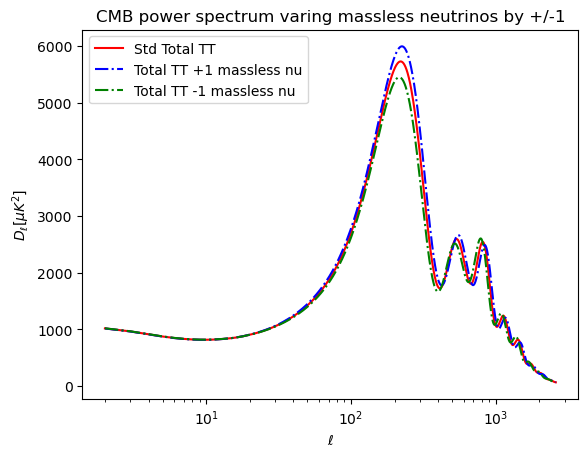

In [54]:
# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],var_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +1 massless nu')
plt.plot(ells[2:],var_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -1 massless nu')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing massless neutrinos by +/-1')
plt.show()

It could be a variation in the radiation drag?

In [55]:
# Reading the file with Planck 2018 data

# File .dat path
file_path = '/home/git/AstroCosmoComputational/Students/Gabriele_Russo/CosmicStructures/Week6/dataCMB.dat'

# Reading the .dat file using pandas
# Separation is given by tab ('\t')
# First line is (header=0)
data = pd.read_csv(file_path, sep=' ', header=0)

# Visualizza i dati letti
print(data)


           l           Dl        -dDl         +dDl
0        2.0   225.895000  132.369000   533.062000
1        3.0   936.920000  450.471000  1212.308000
2        4.0   692.238000  294.111000   666.469000
3        5.0  1501.705000  574.432000  1155.804000
4        6.0   557.611000  201.242000   375.763000
...      ...          ...         ...          ...
2502  2504.0   212.915616  110.537143   110.537143
2503  2505.0    54.752355  110.824874   110.824874
2504  2506.0  -149.315007  111.110198   111.110198
2505  2507.0   -71.474213  111.427400   111.427400
2506  2508.0    51.632731  111.716422   111.716422

[2507 rows x 4 columns]


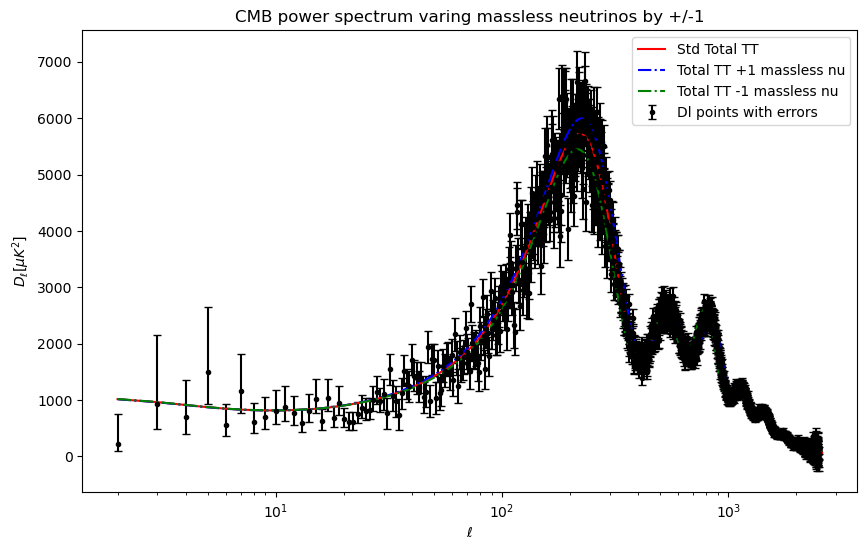

In [56]:
# Adding points to the plot
plt.figure(figsize=(10, 6))

# Plot of 'Dl' with positives and negatives error bars
plt.errorbar(data['l'], data['Dl'], yerr=[data['-dDl'], data['+dDl']], fmt='.', color='k', ecolor='k', capsize=3, label='Dl points with errors')

plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],var_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +1 massless nu')
plt.plot(ells[2:],var_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -1 massless nu')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing massless neutrinos by +/-1')

plt.show()


Without many analisis, the 3 models can't be discriminated.

In [57]:
# Let's compute the chi2 for the standard model
# We will use the formula
# chi2 = sum_i [(Dl_theory - Dl_data)/sigma_Dl_data]^2
# where the sum is over all the data points

# We will use the data['Dl'] as the Dl_data and (data['+dDl']+data['-dDl']) / 2 as the sigma_Dl_data
# We will use the std_totCL[:,0] as the Dl_theory

# Compute the chi2
chi2 = np.sum(((std_totCL[2:-92,0] - data['Dl']) / ((data['+dDl'] + data['-dDl']) / 2))**2)

# Print the chi2
print('The chi2 for the standard model is:', chi2)



The chi2 for the standard model is: 2577.3541478826614


In [58]:
# chi2 for modified parameters
# Compute the chi2 for the modified parameters
chi2_plus = np.sum(((var_totCL_plus[2:-92,0] - data['Dl']) / ((data['+dDl'] + data['-dDl']) / 2))**2)
chi2_minus = np.sum(((var_totCL_minus[2:-92,0] - data['Dl']) / ((data['+dDl'] + data['-dDl']) / 2))**2)

# Print the chi2
print('The chi2 for the model with +1 massless neutrino is:', chi2_plus)
print('The chi2 for the model with -1 massless neutrino is:', chi2_minus)


The chi2 for the model with +1 massless neutrino is: 7751.916700416554
The chi2 for the model with -1 massless neutrino is: 7690.436505784329


In [59]:
# Plaing around with the parameters
extra_nu_pars_plus = std_pars.copy() # Copy the standard parameters
extra_nu_pars_minus = std_pars.copy() # Copy the standard parameters

extra_nu_pars_plus.num_nu_massless += 10.
extra_nu_pars_minus.num_nu_massless += -2.

In [60]:
# Calculate results for these parameters
extra_nu_results_plus = camb.get_results(nu_pars_plus)
extra_nu_results_minus = camb.get_results(nu_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
extra_var_powers_plus = nu_results_plus.get_cmb_power_spectra(extra_nu_pars_plus, CMB_unit='muK')
extra_var_powers_minus = nu_results_minus.get_cmb_power_spectra(extra_nu_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
extra_var_totCL_plus = extra_var_powers_plus['total']
extra_var_totCL_minus = extra_var_powers_minus['total']


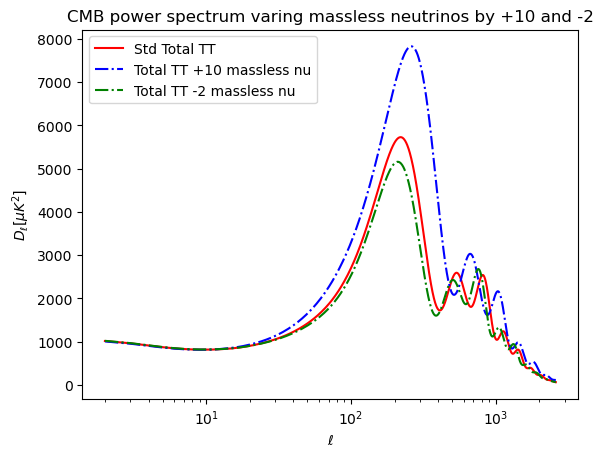

In [62]:
# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],extra_var_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10 massless nu')
plt.plot(ells[2:],extra_var_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -2 massless nu')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing massless neutrinos by +10 and -2')
plt.show()

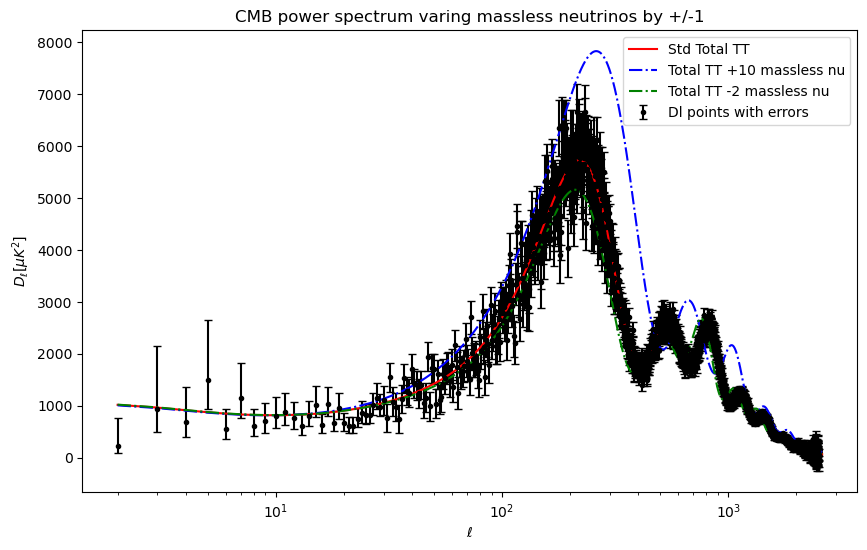

In [63]:
# Adding points to the plot
plt.figure(figsize=(10, 6))

# Plot of 'Dl' with positives and negatives error bars
plt.errorbar(data['l'], data['Dl'], yerr=[data['-dDl'], data['+dDl']], fmt='.', color='k', ecolor='k', capsize=3, label='Dl points with errors')

plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Std Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],extra_var_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10 massless nu')
plt.plot(ells[2:],extra_var_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -2 massless nu')
plt.legend()
plt.xlabel(r'$\ell$')
plt.xscale('log')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum varing massless neutrinos by +10 and -2')

plt.show()

In [64]:
# Compute the chi2 for the modified parameters
extra_chi2_plus = np.sum(((extra_var_totCL_plus[2:-92,0] - data['Dl']) / ((data['+dDl'] + data['-dDl']) / 2))**2)
extra_chi2_minus = np.sum(((extra_var_totCL_minus[2:-92,0] - data['Dl']) / ((data['+dDl'] + data['-dDl']) / 2))**2)

# Print the chi2
print('The chi2 for the standard model is:', chi2)
print('The chi2 for the model with +1 massless neutrino is:', extra_chi2_plus)
print('The chi2 for the model with -1 massless neutrino is:', extra_chi2_minus)

The chi2 for the standard model is: 2577.3541478826614
The chi2 for the model with +1 massless neutrino is: 137352.60067508765
The chi2 for the model with -1 massless neutrino is: 19901.81866928577
